## Rotas de entrega - Caminhao


### Instalação e carregamento das bibliotecas de GA em python

In [1]:
!pip install deap

     |████████████████████████████████| 163kB 4.4MB/s 


In [0]:
import random
import numpy
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import math

### Declaração das funções auxiliares que devem conter as informações do problema

In [0]:
# Função Objetivo -> Repare que o único parametro que a função deve receber é um individuo
def DespesaCaminhoes(individual):
  # Loja1Armazem1 = math.ceil(individual[0])
  # Loja2Armazem1 = math.ceil(individual[1])
  # Loja3Armazem1 = math.ceil(individual[2])
  # Loja1Armazem2 = math.ceil(individual[3])
  # Loja2Armazem2 = math.ceil(individual[4])
  # Loja3Armazem2 = math.ceil(individual[5])
  # Loja1Armazem3 = math.ceil(individual[6])
  # Loja2Armazem3 = math.ceil(individual[7])
  # Loja3Armazem3 = math.ceil(individual[8])
  matrizViagens = numpy.ceil(numpy.resize(individual, [3,3])/4)
  matrizCustos = [[500, 420, 360], [340, 380, 275], [190, 230, 250]]
  custo_total = numpy.sum(matrizViagens*matrizCustos)
  return custo_total,

In [0]:
# Função de restrição que o problema tiver (nem todos os problemas contém restrições)
def FuncaoDeRestricao(individual):
  matrizPacotes = numpy.resize(individual, [3,3])
  armazenamentoMaximo = [430, 190, 120]
  demandaMinima = [230, 95, 190]
  armazenamentoAtingido = sum(matrizPacotes)
  demandaAtingida = sum(matrizPacotes, 2)
  if(numpy.less_equal(armazenamentoAtingido, armazenamentoMaximo).all() and numpy.greater_equal(demandaAtingida, demandaMinima).all()):
    return True
  return False

In [0]:
# Função para cálculo da penalização da função objetivo para os casos em que o individuo não satisfaça as restrições
def Penalizacao(individual):
  matrizPacotes = numpy.resize(individual, [3,3])
  armazenamentoMaximo = [430, 190, 120]
  demandaMinima = [230, 95, 190]
  armazenamentoAtingido = sum(matrizPacotes)
  demandaAtingida = sum(matrizPacotes, 2)
  armazenamentoExcedente = 0
  demandaFaltante = 0
  if(not(numpy.less_equal(armazenamentoAtingido, armazenamentoMaximo).all())):
    armazenamentoExcedente = (numpy.sum(armazenamentoAtingido - armazenamentoMaximo))**2

  if(not(numpy.greater_equal(demandaAtingida, demandaMinima).all())):
    demandaFaltante = (numpy.sum(demandaMinima - demandaAtingida))**2

  return (armazenamentoExcedente + demandaFaltante)**2

In [0]:
# Função utilizada para gerar os individuos -> Repare que não há nenhum mistério, os valores v1 e v2 utilizam a função que é passada por parâmetro que por sua vez
# é uma função que gera numeros aleatorios inteiros entre 0 e 50, como está declarado mais abaixo
# outro ponto importante é como fazer a declaração do cromossomo, procure sempre utilizar tal forma como está decrito, para cada valor, adicionar (append) o mesmo ao cromossomo
# GeradorDeIndividuos(ClasseDoIndividuo, FunçãoDeGeraçãoDeNºAleatorio):
def GeradorDeIndividuos(icls, random_function):
  i = 0
  cromossomo = list()
  for _ in range(150): 
  # while(1):
    a1l1 = random_function()
    a2l1 = random_function()
    a3l1 = random_function()
    a1l2 = random_function()
    a2l2 = random_function()
    a3l2 = random_function()
    a1l3 = random_function()
    a2l3 = random_function()
    a3l3 = random_function()
    if(FuncaoDeRestricao([a1l1, a2l1, a3l1, a1l2, a2l2, a3l2, a1l3, a2l3, a3l3])):
      break
    i = i + 1
  cromossomo.append(a1l1)
  cromossomo.append(a2l1)
  cromossomo.append(a3l1)
  cromossomo.append(a1l2)
  cromossomo.append(a2l2)
  cromossomo.append(a3l2)
  cromossomo.append(a1l3)
  cromossomo.append(a2l3)
  cromossomo.append(a3l3)
  return icls(cromossomo)

### Declaração dos pacotes referentes a biblioteca do GA: 
#### Nomenclatura referente a biblioteca e deve-se alterar somente os pesos das funções que deverão ser, ou maximizada ou minimizada
#### Pode-se alterar também o tipo da variavel do Individuo. Mas que, geralmente, é uma lista de numeros inteiros

In [123]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [0]:
toolbox = base.Toolbox()
# Definir o gerador de numeros aleatórios de numeros inteiros entre o intervalo (0 e 50)
toolbox.register("random_int", random.randint, 0, 300)
# Inicialização do cromossomo (quantos genes o cromossomo deve possuir)
toolbox.register("individual", GeradorDeIndividuos, creator.Individual, toolbox.random_int)
# Registro do individuo na população
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# Registro do nome da função objetivo
toolbox.register("evaluate", DespesaCaminhoes)
# Registro da função de penalidade caso o individuo não obedeça as restrições
toolbox.decorate("evaluate", tools.DeltaPenalty(FuncaoDeRestricao, 0, Penalizacao)) 
# Registro de qual o tipo de cruzamento deve ser utilizado (cruzamento de 2 pontos)
toolbox.register("mate", tools.cxUniform, indpb=0.6)
# toolbox.register("mate", CrossoverFunction, icls=creator.Individual, attr_bool_function=toolbox.attr_bool)
# Registro de qual tipo de mutação deve ser utilizado (probabilidade de um individuo sofrer mutação)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.25)
# toolbox.register("mutate", MutationFunction, indpb=0.1)
# Registro de qual o tipo do método de seleção que será utilizado
toolbox.register("select", tools.selRoulette)

## Chamada efetiva do GA para resolução

In [0]:
pop = toolbox.population(n=14)                           # inicialização da pop
hof = tools.HallOfFame(1)                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [0]:
# Definindo sementes iniciais
ind1 = creator.Individual([80, 120, 110, 75, 90, 170, 42, 37, 12])
pop.append(ind1)

In [141]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.3, ngen=80, stats=stats, halloffame=hof, verbose=True) #aumentei mut = 0.7

gen	nevals	avg        	std      	min        	max        
0  	15    	5.38081e+11	8.024e+11	2.65689e+09	2.84732e+12
1  	13    	1.63474e+12	1.48176e+12	3.1464e+10 	4.53128e+12
2  	12    	1.90566e+12	1.81628e+12	1.08845e+10	4.53128e+12
3  	10    	2.96873e+12	1.56703e+12	1.38458e+11	4.59372e+12
4  	11    	1.95532e+12	1.50347e+12	3.48285e+10	4.21682e+12
5  	14    	2.06671e+12	1.39726e+12	1.21997e+11	4.20506e+12
6  	11    	2.21945e+12	1.41883e+12	7.22643e+11	4.86302e+12
7  	11    	3.11353e+12	1.63622e+12	5.17694e+10	4.86302e+12
8  	11    	2.29844e+12	1.98207e+12	1.21707e+10	4.86302e+12
9  	13    	3.09576e+12	1.60062e+12	6.85468e+09	4.86302e+12
10 	13    	2.21642e+12	1.94195e+12	6.05239e+10	4.86302e+12
11 	13    	2.1825e+12 	1.8988e+12 	5.33795e+08	4.86302e+12
12 	11    	4.00766e+12	1.09825e+12	5.48759e+10	4.86302e+12
13 	13    	3.35244e+12	1.69352e+12	6.25e+10   	4.86302e+12
14 	11    	3.57782e+12	1.41912e+12	1.07504e+10	4.86302e+12
15 	13    	3.76189e+12	1.51588e+12	4.92134e+10	4.86302e+12
1

## Resultados

In [142]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof[0])

# Verificação da função de restrição
print(FuncaoDeRestricao(hof[0]))


# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
DespesaCaminhoes(hof[0])

Melhor Indivíduo:
[213, 1, 0, 0, 233, 242, 203, 0, 0]
False
Melhor Resultado da Função Objetivo:


(76305.0,)

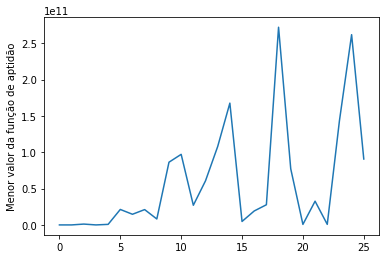

In [70]:
import matplotlib.pyplot as plt
gen, minVal = log.select("gen", "min")
plt.plot(gen, minVal)
plt.ylabel('Menor valor da função de aptidão')
plt.show()

## Utilizando a forma alternativa de resolução do mesmo problema

In [0]:
# definição da população inicial
population = toolbox.population(n=30)
# quantidade de gerações
NGEN=25
bestIndEachGeneration = []
bestInd = []
for gen in range(NGEN):
  print("Geracao: ", gen)
  offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
  fits = list(toolbox.map(toolbox.evaluate, offspring))
  
  indexes = range(len(offspring))
  indexes = [x for _,x in sorted(zip(fits, indexes))]
  fits = [fits[x] for x in indexes]
  offspring = [offspring[x] for x in indexes]
  print(offspring)
  print(fits)
  for fit, ind in zip(fits, offspring):
    ind.fitness.wvalues = fit
  elites_ind = offspring[:max(1, round(0.15*len(offspring)))]
  population = toolbox.select(offspring, len(population)-len(elites_ind))
  population.extend(elites_ind)
  bestIndEachGeneration.append([offspring[fits.index(min(fits))], min(fits)])
  bestInd.append(min(bestIndEachGeneration, key=lambda t:t[1])[1])
  print(" Melhor Avaliação dessa geração: ", bestIndEachGeneration[-1][1], "\n", 
        "Melhor Avaliação Geral", min(bestIndEachGeneration, key=lambda t:t[1])[1], "\n",
        "Da geração: ", bestIndEachGeneration.index(min(bestIndEachGeneration, key=lambda t:t[1])), "\n",
        "Cromossomo: ", min(bestIndEachGeneration, key=lambda t:t[1])[0], "\n"
       )


Geracao:  0
[[29, 14, 14], [18, 14, 32], [18, 17, 30], [35, 16, 19], [20, 35, 16], [28, 18, 26], [27, 23, 23], [38, 16, 22], [14, 45, 20], [17, 31, 41], [15, 30, 45], [27, 38, 26], [26, 39, 29], [45, 39, 18], [44, 22, 37], [25, 44, 34], [35, 47, 24], [36, 35, 35], [25, 40, 43], [30, 44, 35], [38, 45, 26], [47, 16, 48], [39, 48, 29], [42, 24, 50], [40, 47, 35], [43, 44, 36], [45, 43, 39], [46, 40, 43], [26, 0, 34], [14, 19, 46]]
[(55290,), (62080,), (63050,), (67900,), (68870,), (69840,), (70810,), (73720,), (76630,), (86330,), (87300,), (88270,), (91180,), (98940,), (99910,), (99910,), (102820,), (102820,), (104760,), (105730,), (105730,), (107670,), (112520,), (112520,), (118340,), (119310,), (123190,), (125130,), (3953392507768081,), (4353059668353841,)]
 Melhor Avaliação dessa geração:  (55290,) 
 Melhor Avaliação Geral (55290,) 
 Da geração:  0 
 Cromossomo:  [29, 14, 14] 

Geracao:  1
[[18, 16, 19], [29, 14, 14], [18, 14, 32], [35, 17, 30], [14, 45, 26], [14, 44, 35], [30, 19, 46]

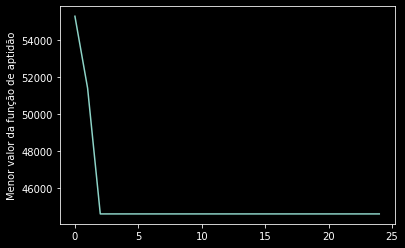

In [0]:
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt
plt.plot(bestInd)
plt.ylabel('Menor valor da função de aptidão')
plt.show()